# Word Embedding In Natural language Processing


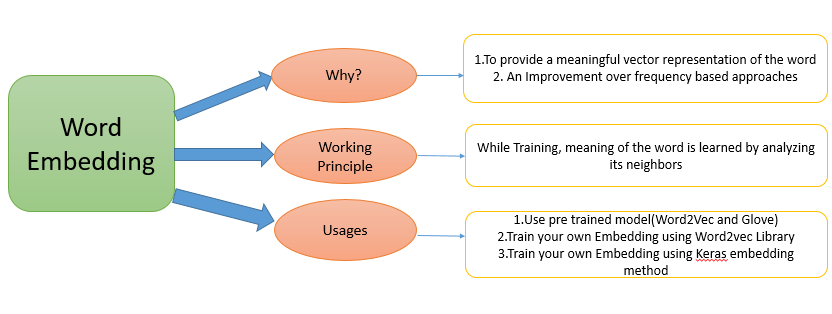

In [56]:
from IPython.display import Image
Image("C:\\Users\\User\\Desktop\\Why.png")

# In this video, I will explain how to use all options in Python - Step By Step

# Option 2 - Training own word2vec model

In [102]:
# define tokenized senences as training data
tokenized_sentences = [['Hello','This','is','python','training','by','Aman'],
             ['Hello','This','is','Java','training','by','Aman'],
             ['Hello','This','is','Data Science','training','by','Unfold','Data','Science'],
             ['Hello','This','is','programming','training','']]

In [103]:
# training word2vec model
from gensim.models import Word2Vec
import warnings
warnings.filterwarnings('ignore')
mymodel = Word2Vec(tokenized_sentences, min_count=1)

In [104]:
# summarizing the loaded model
print(mymodel)

Word2Vec(vocab=14, size=100, alpha=0.025)


In [105]:
# summarize vocabulary
words = list(mymodel.wv.vocab)

In [106]:
# summarize vocabulary
print(words)

['Hello', 'This', 'is', 'python', 'training', 'by', 'Aman', 'Java', 'Data Science', 'Unfold', 'Data', 'Science', 'programming', '']


In [108]:
# access word vector for one word "training"
print(mymodel['Hello'])

[-1.29057036e-03  9.66448628e-04 -2.47997092e-03 -2.65065557e-03
  3.72335361e-03 -4.39718273e-03  1.97237357e-03 -1.44302833e-03
 -1.91817572e-03 -2.13687250e-04 -2.55077146e-03 -1.06538049e-04
 -2.27423012e-03 -3.54627939e-03  1.30975060e-03  2.83665140e-03
 -1.33959565e-03 -2.01164535e-03  4.08288324e-03 -1.43593410e-03
 -4.14999994e-03 -3.07691819e-03  4.75141732e-03 -4.39218897e-03
 -2.67431984e-04 -4.10796842e-03  2.47730827e-03  1.53240413e-04
 -3.96444183e-03 -4.44780057e-03  4.87192720e-03  4.40953299e-03
 -2.86479807e-03 -4.61584423e-03  2.55768979e-03 -2.24311098e-05
 -2.36961548e-03 -4.81007621e-03  1.84294651e-03  3.18565592e-03
 -1.44096324e-03 -2.55802553e-03  4.61268285e-03  2.46369722e-03
 -2.43039755e-03  2.45426642e-03 -5.27902797e-04 -8.97626393e-04
  1.63730292e-03 -1.85419829e-03 -2.84352363e-03 -2.21385248e-03
  4.66252025e-03 -4.10496909e-03  1.26229628e-04  1.03836916e-04
 -2.59537762e-03 -2.98997527e-03  3.72429006e-03 -5.98023064e-04
  9.11942407e-05  2.31004

In [110]:
#try finding most similar words for word "Data"
mymodel.most_similar("laptop")

KeyError: "word 'laptop' not in vocabulary"

# First Task for you - comment me how you can solve a document classification problem using above concept


In [ ]:
#####################################Part 2###################################################

# Option 3 - Create Embedding model using Keras Embedding

In [64]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
# define documents
Sent = ['Hello, how are you',
        'how are you',
        'how are you doing',
        'I am doing great',
        'I am doing good',
        'I am good']

In [111]:
# defining class labels
sent_labels = array([1,1,1,0,0,0])

In [112]:
# integer encoding of the documents
my_vocab_size = 30
encoded_sent = [one_hot(i, my_vocab_size) for i in Sent]
print(encoded_sent)

[[28, 8, 27, 17], [8, 27, 17], [8, 27, 17, 13], [16, 20, 13, 23], [16, 20, 13, 11], [16, 20, 11]]


In [67]:
# padding documents to a max length =5 
length = 5
padded_sent = pad_sequences(encoded_sent, maxlen=length, padding='pre')
print(padded_sent)

[[ 0 28  8 27 17]
 [ 0  0  8 27 17]
 [ 0  8 27 17 13]
 [ 0 16 20 13 23]
 [ 0 16 20 13 11]
 [ 0  0 16 20 11]]


In [113]:
# defining the model
mymodel = Sequential()
mymodel.add(Embedding(my_vocab_size, 8, input_length=max_length))
mymodel.add(Flatten())
mymodel.add(Dense(1, activation='sigmoid'))


In [114]:
# compiling the model
mymodel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [119]:
# fiting  the model
mymodel.fit(padded_docs, labels, epochs=30)

# evaluate the model
modelloss, modelaccuracy = mymodel.evaluate(padded_docs, labels, verbose=0)
print('Accuracy: %f' % (modelaccuracy*100))

Epoch 1/30
6/6 [==============================] - 0s 833us/step - loss: 0.6182 - accuracy: 1.0000
Epoch 2/30
6/6 [==============================] - 0s 418us/step - loss: 0.6156 - accuracy: 1.0000
Epoch 3/30
6/6 [==============================] - 0s 500us/step - loss: 0.6131 - accuracy: 1.0000
Epoch 4/30
6/6 [==============================] - 0s 500us/step - loss: 0.6106 - accuracy: 1.0000
Epoch 5/30
6/6 [==============================] - 0s 500us/step - loss: 0.6080 - accuracy: 1.0000
Epoch 6/30
6/6 [==============================] - 0s 333us/step - loss: 0.6054 - accuracy: 1.0000
Epoch 7/30
6/6 [==============================] - 0s 333us/step - loss: 0.6028 - accuracy: 1.0000
Epoch 8/30
6/6 [==============================] - 0s 666us/step - loss: 0.6002 - accuracy: 1.0000
Epoch 9/30
6/6 [==============================] - 0s 500us/step - loss: 0.5976 - accuracy: 1.0000
Epoch 10/30
6/6 [==============================] - 0s 833us/step - loss: 0.5950 - accuracy: 1.0000
Epoch 11/30
6/6 [==

# The Prediction part

In [116]:
mysent_to_predict = ['how are you Suman',
        'I am good']

In [117]:
# integer encode the documents
vocab_size = 30
encoded = [one_hot(d, vocab_size) for d in mysent_to_predict]
print(encoded)


[[8, 27, 17, 10], [16, 20, 11]]


In [118]:
# pad documents to a max length of 5 words
max_length = 5
mypadded = pad_sequences(encoded, maxlen=max_length, padding='pre')
print(mypadded)

[[ 0  8 27 17 10]
 [ 0  0 16 20 11]]


In [120]:
mymodel.predict_classes(mypadded)

array([[1],
       [0]])

# Option 1 - Using Pre Trained Word2Vec Model

In [12]:
from gensim.models import KeyedVector   
import os 
os.chdir("F:\\")

In [ ]:
#Download GoogleNews-vectors-negative300.bin from 
#https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz

In [13]:
PreTrainedModel = KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300.bin", binary=True)

In [15]:
# calculate: (king - man) + woman = ?
result = PreTrainedModel.most_similar("Data")
print(result)

MemoryError: 